In [1]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
import re
import cv2
import numpy as np

In [2]:
## defining a frame for image and mask storage
framObjTrain = {'img' : [],
           'mask' : []
          }

framObjValidation = {'img' : [],
           'mask' : []
          }

## defining data Loader function
def LoadData( frameObj = None, imgPath = None, maskPath = None, shape = 128):
    imgNames = os.listdir(imgPath)
    maskNames = []
    
    ## generating mask names
    for mem in imgNames:
        maskNames.append(re.sub('\.png', '_L.png', mem))
    
    imgAddr = imgPath + '/'
    maskAddr = maskPath + '/'
    
    for i in range (len(imgNames)):
        img = plt.imread(imgAddr + imgNames[i])
        mask = plt.imread(maskAddr + maskNames[i])
        
        img = cv2.resize(img, (shape, shape)) 
        mask = cv2.resize(mask, (shape, shape))
        
        # flip images
        img_flip = cv2.flip(img, 1)
        mask_flip = cv2.flip(mask, 1)
        
        frameObj['img'].append(img)
        frameObj['mask'].append(mask)
        frameObj['img'].append(img_flip)
        frameObj['mask'].append(mask_flip)
        
    return frameObj

In [4]:
framObjValidation  = LoadData( framObjValidation, imgPath = 'CamVid/val', maskPath = 'CamVid/val_labels', shape = 128)

In [6]:
myTransformer = load_model('streets_semantic_segmentation.h5')

In [7]:
## function for getting 16 predictions
def predict16 (valMap, model, shape = 256):
    ## getting and proccessing val data
    img = valMap['img']
    mask = valMap['mask']
    mask = mask[0:16]
    
    imgProc = img [0:16]
    imgProc = np.array(img)
    
    predictions = model.predict(imgProc)
    for i in range(len(predictions)):
        predictions[i] = cv2.merge((predictions[i,:,:,0],predictions[i,:,:,1],predictions[i,:,:,2]))
    
    return predictions, imgProc, mask
    

    
    
def Plotter(img, predMask, groundTruth):
    plt.figure(figsize=(7,7))
    
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title('image')
    
    plt.subplot(1,3,2)
    plt.imshow(predMask)
    plt.title('Predicted Mask')
    
    plt.subplot(1,3,3)
    plt.imshow(groundTruth)
    plt.title('actual Mask')

In [8]:
sixteenPrediction, actuals, masks = predict16(framObjValidation, myTransformer)

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 679ms/step


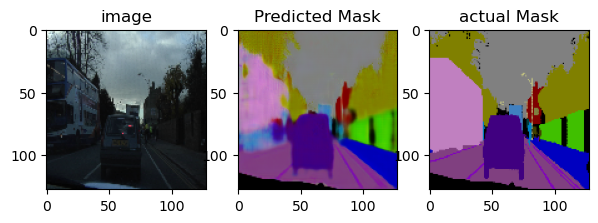

In [9]:
Plotter(actuals[1], sixteenPrediction[1], masks[1])

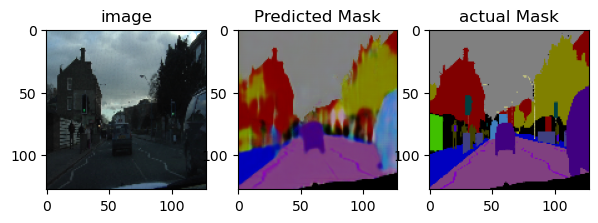

In [10]:
Plotter(actuals[10], sixteenPrediction[10], masks[10])

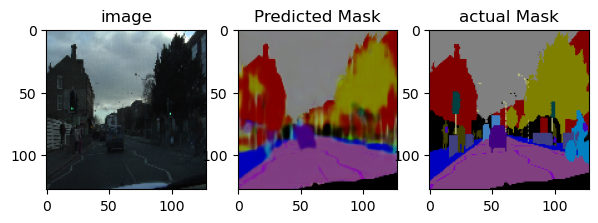

In [11]:
Plotter(actuals[12], sixteenPrediction[12], masks[12])

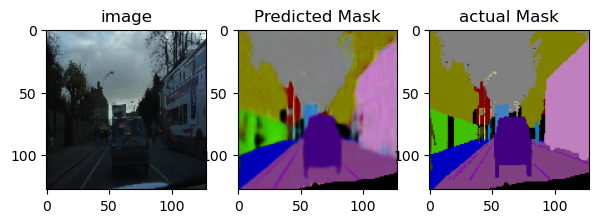

In [13]:
Plotter(actuals[2], sixteenPrediction[2], masks[2])